<a href="https://colab.research.google.com/github/AllisonOdette0901/SIDO_2024_2/blob/main/Practica1_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios. Búsqueda local y exhaustiva.



Mónica Ángeles Sánchez 317159662

**Ejercicio 1**

Implementa una función que tome un grafo y una lista de vértices en un ciclo hamiltoniano, y devuelva el peso de este ciclo.

In [1]:
# paqueterías con las que se trabajan en todo el ejercicio
import networkx as nx
import math

In [2]:
# Esta función retorna el peso de un ciclo
# No olvides que debes añadir la última arista donde se conectan el último vértice con el primero de la lista
# Si necesitas obtener el peso de una arista entre dos vértices u y v, puedes hacerlo mediante g[u][v]['weight']
def cycle_length(g, cycle):
    # Checamos si el número de vértices en la gráfica es igual al número de vértices en el ciclo
    assert len(cycle) == g.number_of_nodes()

    peso_ciclo=0
    for i in range(len(cycle) - 1):
        
        # Definimos los vértices u y v 
        u = cycle[i]
        v = cycle[i + 1]

        # Sumamos el peso de la arista entre los vértices u y v
        peso_ciclo += g[u][v]['weight']

    # Añadimos el peso de la última arista donde se conectan el último vértice con el primero de la lista
    peso_ciclo += g[cycle[-1]][cycle[0]]['weight']

    # Retornamos el peso del ciclo
    return peso_ciclo

In [3]:
# Aquí hay un ejemplo para probar tu código
# Creamos un objeto gráfica vacío
g = nx.Graph()
# Agregamos 6 aristas y 4 vértices
g.add_edge(0, 1, weight = 2)
# Se trabajaran con aristas no dirigidas, entonces si agregamos la arista de u a v, automáticamente se agrega de v a u
g.add_edge(1, 2, weight = 2)
g.add_edge(2, 3, weight = 2)
g.add_edge(3, 0, weight = 2)
g.add_edge(0, 2, weight = 1)
g.add_edge(1, 3, weight = 1)


In [4]:
# Ahora vamos a calcular el peso de estos dos ciclos:
cycle1 = [0, 1, 2, 3]
cycle_length(g, cycle1)

8

In [5]:
cycle2 = [0, 2, 1, 3]
cycle_length(g, cycle2)

6

¿Cuál es el peso de los dos ciclos?

El peso del ciclo 1 es 8 y el peso del ciclo 2 es 6

## Búsqueda exhaustiva

**Ejercicio 2.**

Implementa el algoritmo de búsqueda exhaustiva para el Problema de agente vaijeroo. El algoritmo debe comprobar todas las permutaciones de los vértices y devolver el peso mínimo de un ciclo que visite cada vértice exactamente una vez.

In [6]:
# Paquetería que vas a utilizar (googlea la función que tiene)
import itertools

In [7]:
# La función all_permutations recibe un objeto gráfica g
# La gráfica es completa, no dirigida y sin ciclos
# La función debe retornar el PESO del ciclo hamiltoniano más corto
# No olvides añadir la última arista que conecta al último vértice con el primero.
# Debes iterar a través de todas las permutaciones del conjunto {0, ..., n-1} y encontrar el ciclo de menor peso

def all_permutations(g):
    # n es el número de vértices
    n = g.number_of_nodes()
    # lista de vértices
    vertices=list(g.nodes())
    # Indicamos que el peso minimo es infinito para que funcione correctamente
    peso_minimo=float('inf')
    # Itera a través de todas las permutaciones
    permutations = itertools.permutations(range(n))
    # Itera a través de todos los n vértices
    for p in permutations:
        # Indicamos en qué ciclo estamos
        ciclo_actual=[vertices[i] for i in p]
        # Indicamos el peso del ciclo en el que estamos
        peso_ciclo_actual = cycle_length(g, ciclo_actual)
        # Buscamos qué ciclo tiene menor peso
        peso_minimo=min(peso_ciclo_actual,peso_minimo)
    #Obtenemos el ciclo de menor peso
    return peso_minimo

Ahora pruebalo para g. ¿Cuál es la distancia del mínimo ciclo hamiltoniano?

In [8]:
all_permutations(g)

6

La distancia del mínimo ciclo hamiltoniano es 6

## Gráfica del resultado.

Utiliza la función all_permutations para ahora obtener el ciclo hamiltoniano

In [9]:
# Coloca aquí la función all_permutations modificada
def all_permutations(g):
    # n es el número de vértices
    n = g.number_of_nodes()
    # lista de vértices
    vertices=list(g.nodes())
    # Indicamos que el peso minimo es infinito para que funcione correctamente
    peso_minimo=float('inf')
    # Itera a través de todas las permutaciones
    permutations = itertools.permutations(range(n))
    # Indicamos que no hay un mejor ciclo
    mejor_ciclo = None
    # Itera a través de todos los n vértices
    for p in permutations:
        # Indicamos en qué ciclo estamos
        ciclo_actual=[vertices[i] for i in p]
        # Indicamos el peso del ciclo en el que estamos
        peso_ciclo_actual = cycle_length(g, ciclo_actual)
        # Verificamos si el ciclo en el que estamos tiene menor peso y por lo tanto será el mejor ciclo
        if peso_ciclo_actual < peso_minimo:
            peso_minimo = peso_ciclo_actual
            mejor_ciclo = ciclo_actual
    return mejor_ciclo

In [10]:
# paquetería
import matplotlib.pyplot as plot

In [11]:
#  Calculamos la distancia entre dos puntos
def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Función que recibe una lista de 2 tuplas que son las coordenadas
# y retornamos la gráfica correspondiente
def get_graph(coordinates):
    g = nx.Graph()
    n = len(coordinates)
    for i in range(n):
        for j in range(i + 1):
            g.add_edge(i, j, weight=dist(coordinates[i][0], coordinates[i][1], coordinates[j][0], coordinates[j][1]))
    return g

In [12]:
# Esta función recibe
# 1. una lista de coordenadas (x,y) de g
# 2. un ciclo a visualizar
def plot_cycle(coordinates, cycle):
    # Calcula las coordinadas 'x' y 'y' en el orden de acuerdo al ciclo
    x_coordinates = [coordinates[i][0] for i in cycle]
    y_coordinates = [coordinates[i][1] for i in cycle]

    # Añadimos el primer vértice para cerrar el ciclo
    x_coordinates.append(coordinates[cycle[0]][0])
    y_coordinates.append(coordinates[cycle[0]][1])

    plot.plot(x_coordinates, y_coordinates, 'xb-', )
    plot.show()

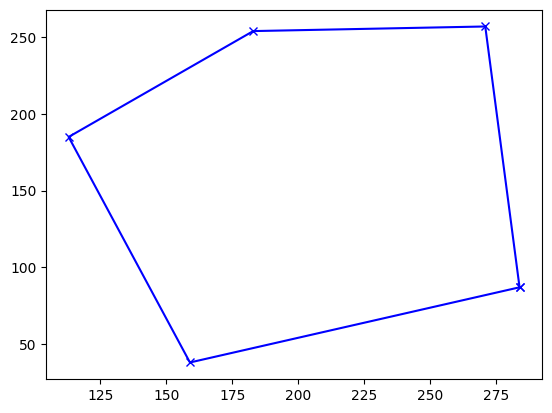

In [13]:
# Considera los siguientes 5 puntos
coordenadas = [
    (284, 87),
    (183, 254),
    (113, 185),
    (159, 38),
    (271, 257)
    ]
# Creamos la gráfica
g1 = get_graph(coordenadas)
# utiliza la función modificada para obtener el ciclo y guardarlo aquí
cycle = all_permutations(g1)
# graficamos el resultado
plot_cycle(coordenadas, cycle)